# Исследование продаж видеоигр.

# Video game sales research.

## Оглавление и описание проекта.

## Table of contents and description of the project.

<div class="alert alert-info">Интеренет-магазин продаёт компьётерные игры по всему миру. Нам досутпные исторические данные о продажах игр, их оценках от пользователей и экспертов, жанры и платформы. Необходимо определить закономерности, которые делают одни игры успешными, а другие нет. Этот анализ позволит понять, какой продукт будет иметь успех в будующем и составить рекламнные компании для его продвижения. </div>

<div class="alert alert-info">Internet store sells computer games all over the world. We have access to historical data on game sales, their ratings from users and experts, genres and platforms. It is necessary to identify the patterns that make some games successful and others not. This analysis will allow you to understand which product will be successful in the future and create advertising campaigns to promote it. </div>

- [Шаг 1. Изучение общей информации о данных.](#Step_1)
[Переменные.](#Step_2) <br />
[Загрузка данных.](#Step_3) <br />
- [Шаг 2. Предобработка данных.](#Step_4)
[Обработка пропусков и изменение типов данных.](#Step_5) <br />
[Унификация регистра и удаление дубликатов](#Step_6) <br />
[Расчет дополнительных показателей.](#Step_7) <br />
- [Шаг 3. Исследовательский анализ.](#Step_8)
[Количество выпущенных игр в разные годы.](#Step_9) <br />
[Изменение продаж по платформам.](#Step_10) <br />
[Выбор актуального периода.](#Step_11) <br />
[Лидирующие платформы по продажам игр.](#Step_12) <br />
[Размах продаж игр в разбивке по платформам. ](#Step_13) <br />
[Влияние отзывов на продажи игр в разбивке по платформам.](#Step_14) <br />
[PS4.](#Step_15) <br />
[3DS.](#Step_16) <br />
[XOne.](#Step_17) <br />
[Распределение игр по жанрам.](#Step_18) <br />
- [Шаг 4. Портрет пользователя каждого региона.](#Step_19)
[Северная Америка.](#Step_20) <br />
[Европа.](#Step_21)<br />
[Япония.](#Step_22)<br />
- [Шаг 5. Проверка гипотез.](#Step_23)
[Тест A.](#Step_24)<br />
[Тест B.](#Step_25)<br /> 
- [Шаг 6. Вывод.](#Step_26)

- [Step 1. Examine general information about the data.](#Step_1)
[Variables.](#Step_2) <br />
[Loading data.](#Step_3) <br />
- [Step 2. Data preprocessing.](#Step_4)
[Handling gaps and changing data types.](#Step_5) <br />
[Case unification and removal of duplicates](#Step_6) <br />
[Calculation of additional indicators.](#Step_7) <br />
- [Step 3 Exploratory Analysis.](#Step_8)
[Number of released games in different years.](#Step_9) <br />
[Change sales by platform.](#Step_10) <br />
[Select current period.](#Step_11) <br />
[Top platforms for game sales.](#Step_12) <br />
[Games sales range by platform. ](#Step_13) <br />
[Influence of reviews on game sales by platform.](#Step_14) <br />
[PS4.](#Step_15) <br />
[3DS.](#Step_16) <br />
[XOne.](#Step_17) <br />
[Distribution of games by genre.](#Step_18) <br />
- [Step 4. User portrait of each region.](#Step_19)
[North America.](#Step_20) <br />
[Europe.](#Step_21)<br />
[Japan.](#Step_22)<br />
- [Step 5. Hypothesis testing.](#Step_23)
[Test A.](#Step_24)<br />
[Test B.](#Step_25)<br />
- [Step 6. Output.](#Step_26)

<a id='Step_1'></a>
## Шаг 1. Изучение общей информации о данных.

## Step 1. Explore general information about the data.

<a id='Step_2'></a>
### Переменные.

### Variables.

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10); 'tbd' - рейтинг ожидается
- Rating — рейтинг от организации ESRB (EC — для детей младшего возраста, E — для всех, E-A — для всех, E10+ - для всех от 10 лет и старше, T — подросткам, M — для взрослых, AO — только для взрослых, RP — рейтинг ожидается)

- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10); 'tbd' - rating expected
- Rating - rating from the ESRB organization (EC - for young children, E - for all, E-A - for all, E10+ - for all 10 years and older, T - for teenagers, M - for adults, AO - only for adults, RP - rating pending)

<a id='Step_3'></a>
### Загрузка данных.

### Loading data.

Загружаем библиотеки и файл.

Download libraries and file.

In [53]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import warnings
import matplotlib as plt
%matplotlib inline

In [54]:
df = pd.read_csv('/datasets/games.csv')

Смотрим на данные.

Let's look at the data.

In [55]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем названия столбцов к нижнему регистру.

Let's convert the column names to lower case.

In [56]:
df.columns = df.columns.str.lower() 

Посмотрим общую информацию о данных.

Let's look at general information about the data.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Итог:
- Видим много пропусков в оценках критиков и пользователей, рейтинге игры. 
- Наблюдаем некорректные форматы.

### Result:
- We see a lot of gaps in the ratings of critics and users, the rating of the game.
- Watching incorrect formats.

<a id='Step_4'></a>
## Шаг 2. Предобработка данных.

## Step 2. Data preprocessing.

<a id='Step_5'></a>
### Обработка пропусков и изменение типов данных.

### Handling gaps and changing data types.

- name - мало пропузенных значений, заполнить не получится - удалим
- platform - нет пропусков
- year_of_release - мало пропузенных значений, заполнить не получится - удалим
- genre - мало пропузенных значений, заполнить не получится - удалим
- na_sales - нет пропусков, но есть нули
- eu_sales - нет пропусков, но есть нули
- jp_sales - нет пропусков, но есть нули
- other_sales - нет пропусков, но есть нули
- critic_score - заполним медианами по жанру
- user_score - 'tbd' - изменим на 'nan' и заполним медианами по жанру
- rating - много пропущенных значений - оставим как есть

- name - there are few missing values, it will not work to fill - delete
- platform - no skips
- year_of_release - there are few missing values, it will not work to fill - delete
- genre - few missing values, it will not work to fill - delete
- na_sales - no gaps, but zeros
- eu_sales - no gaps, but zeros
- jp_sales - no gaps, but zeros
- other_sales - no gaps, but zeros
- critic_score - fill in medians by genre
- user_score - 'tbd' - change to 'nan' and fill with medians by genre
- rating - many missing values - leave as is

In [58]:
# Заполним пропуски в рейтнге критиков медианами.
df['critic_score'] = df.groupby('genre')['critic_score'].apply(lambda x: x.fillna(x.mean()))
# Заменим 'tbd' на Nan, так как 'tbd' означает, что оценки еще нет.
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
# Изменим тип данных 'user_score' на float.
df['user_score'] = df['user_score'].astype('float64')
# Заполним пропуски в рейтнге критиков медианами.
df['user_score'] = df.groupby('genre')['user_score'].apply(lambda x: x.fillna(x.mean()))
#Удалим строки с пропусками в 'name', 'year_of_release', 'genre'.
df.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)
# Изменим тип данных 'year_of_release' на целочисленное значение.
df['year_of_release'] = df['year_of_release'].astype('int64')

<a id='Step_6'></a>
### Унификация регистра и удаление дубликатов

### Case unification and removal of duplicates

In [59]:
# Приводим к нижнему регистру.
for i in df.select_dtypes(include = ['object']):
    df[i] = df[i].str.lower()
# Удаляем дубликаты.
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

Посмотрим на результат.

Let's look at the result.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<a id='Step_7'></a>
### Расчет дополнительных показателей.

### Calculation of additional indicators.

Добавим общую выручку для каждой игры.

Let's add the total revenue for each game.

In [61]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [62]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.000000,8.000000,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,68.058350,7.301402,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.000000,8.300000,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.000000,8.000000,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,72.652646,7.619515,NaN,31.38


### Итог: 
- пропуски заполнены
- форматы исправлены
- дубликаты и строки, где пропуски невозомжно удалить, удалены
- добавлен столбец с общим объёмом продаж по каждой игре

### Result:
- gaps filled
- formats fixed
- duplicates and lines where gaps cannot be removed have been removed
- added a column with total sales for each game

<div class="alert alert-info">Пропуски в name, year_of_release, genre и rating скорее всего обусловлены ошибками при сборе данных, так как эта информация является базовым описание игры. Пропуски в оценках критиков и пользователей, возможно, обсусловлены неправильным выбором ресурса, на котором собиралась информация или же эти игры на столько не популярны. </div>

<div class="alert alert-info">The omissions in name, year_of_release, genre, and rating are most likely due to errors in data collection, since this information is the base description of the game. The gaps in the ratings of critics and users may be due to the wrong choice of the resource on which the information was collected, or these games are not so popular. </div>

<a id='Step_8'></a>
## Шаг 3. Исследовательский анализ.

## Step 3. Exploratory analysis.

<a id='Step_9'></a>
### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

### Let's see how many games were released in different years. Is data for all periods important?

In [63]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='year_of_release')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Думаю, что данные об играх выпущенных ранее 2012 года не важны для текущего анализа.

I think that data on games released before 2012 is not important for the current analysis.

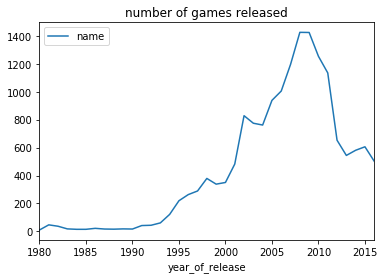

In [64]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='year_of_release').plot(
    title='number of games released');

<div class="alert alert-info">Похоже, что игровая индустрия пережила свои лучшие годы в 2004-2011 годах. Объем выпускаемых игр в 2017 году скорее будет похож на объем выпущенных игр в 2012-2016 годах.</div>


<div class="alert alert-info">The gaming industry seems to have had its best years in 2004-2011. The volume of games released in 2017 is more likely to be similar to the volume of games released in 2012-2016.</div>

<a id='Step_10'></a>
### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

### Let's see how sales changed by platform. Let's choose the platforms with the highest total sales and plot the distribution by years. How long does it take for new platforms to appear and old ones to disappear?

In [65]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
gb       254.43
xb       251.57
nes      251.05
n64      218.01
snes     200.04
gc       196.73
xone     159.32
2600      86.48
wiiu      82.19
psv       53.81
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales, dtype: float64

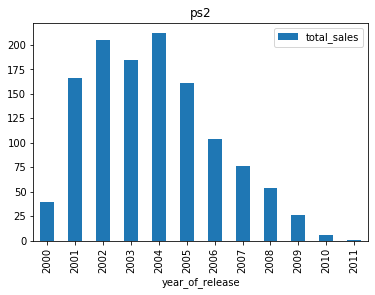

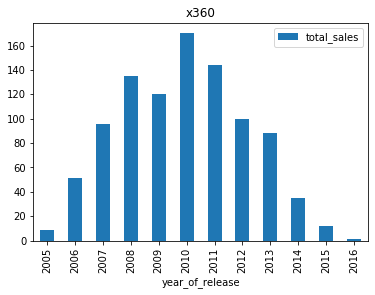

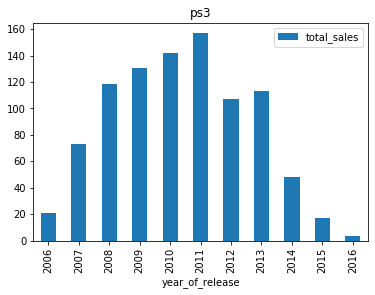

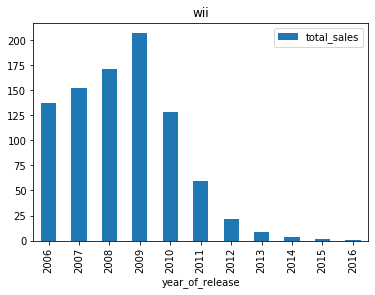

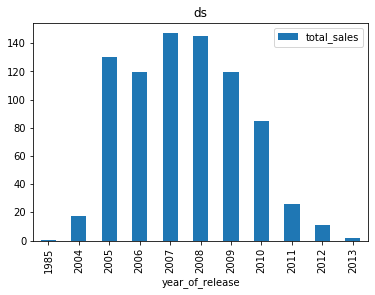

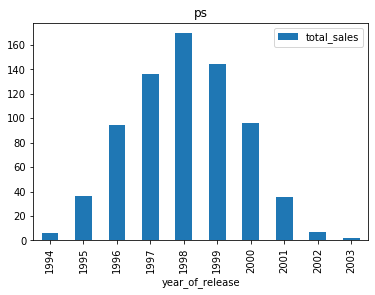

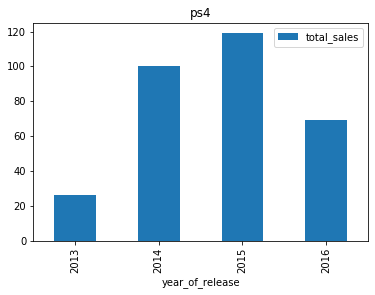

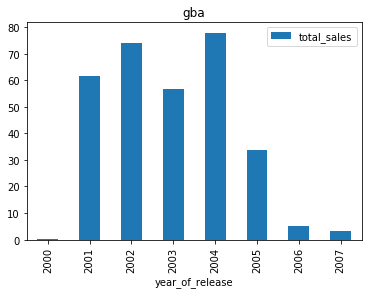

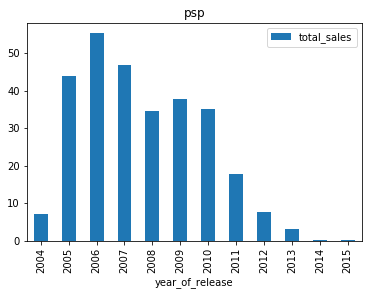

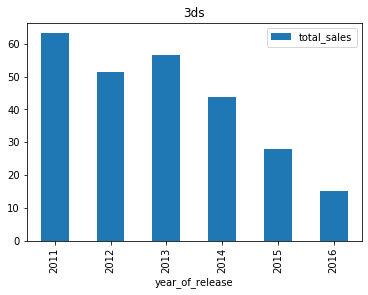

In [66]:
for i in df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index:
    df.query('platform == @i').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', 
                                                                                                              title=i)

- Похоже, что платформа живет 12 лет...
- Основной объем продаж длится 5 лет.
- Это все не касатеся ПК. У них более длинная история.



- It looks like the platform has been alive for 12 years...
- The main sales volume lasts 5 years.
- This is not about PC. They have a longer history.

<a id='Step_11'></a>
### Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

### Let's take the data for the corresponding actual period. The current period will be determined independently as a result of the study of previous issues. The main factor is that these data will help build a forecast for 2017.

Будем исследовать данные за последние 5 лет (с 2012 года).

We will examine the data for the last 5 years (since 2012).

<a id='Step_12'></a>
### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

### Which platforms are leading in sales, rising or falling? Pick a few potentially profitable platforms.

К 2016 году всё еще продаются игры на следующие платформы:

As of 2016, games are still being sold on the following platforms:

In [67]:
for i in df[df['year_of_release'] == 2016]['platform'].unique():
    print(i)

ps4
3ds
xone
wiiu
ps3
pc
x360
psv
wii


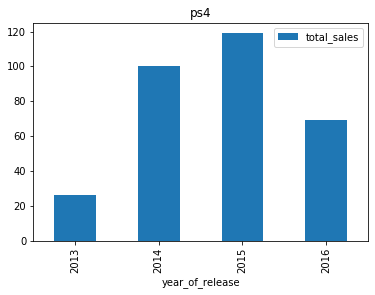

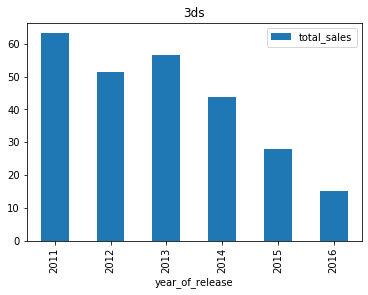

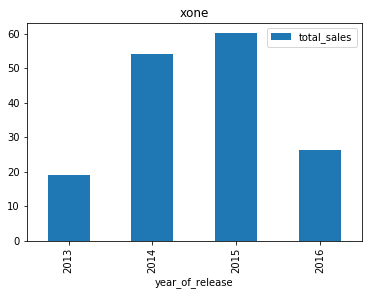

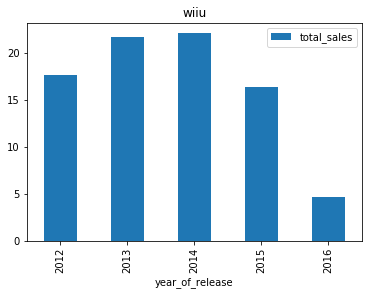

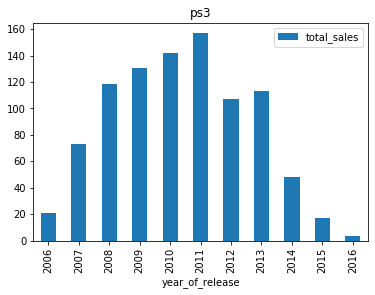

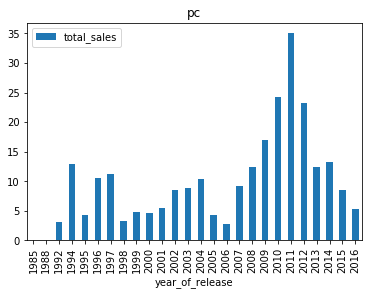

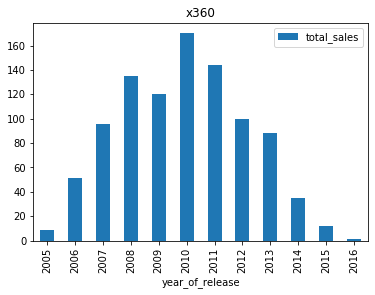

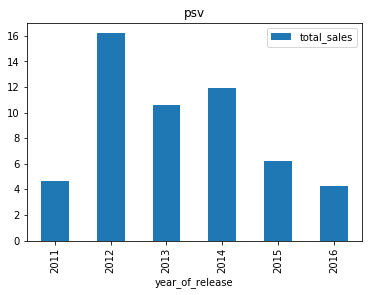

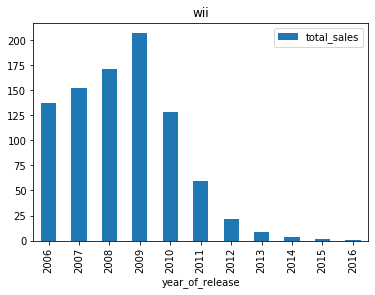

In [68]:
for i in df[df['year_of_release'] == 2016]['platform'].unique():
    df.query('platform == @i').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', 
                                                                                                              title=i)

Все платформы показывают падение продаж. Исходя из объема продаж, наиболее приоритетными оказываются ps4, 3ds и xone.

All platforms show a drop in sales. Based on sales volume, ps4, 3ds and xone are top priority.

<a id='Step_13'></a>
### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

### Let's plot a box and mustache chart of global game sales by platform.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, 'Sales (pieces)')

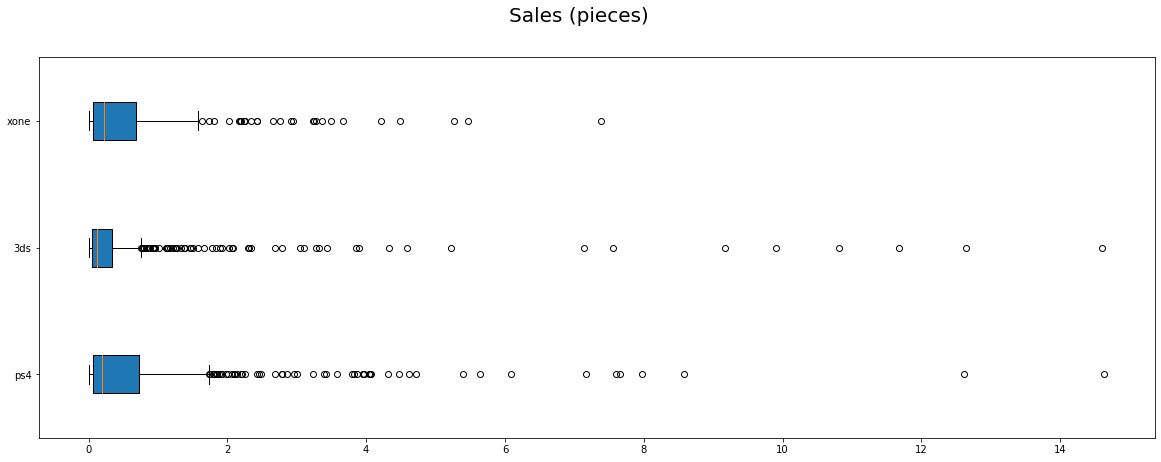

In [69]:
plt.pyplot.boxplot((df[df['platform'] == 'ps4']['total_sales'], df[df['platform'] == '3ds']['total_sales'], 
df[df['platform'] == 'xone']['total_sales']), labels=('ps4', '3ds', 'xone'), vert=False, patch_artist=True)
fig = plt.pyplot.gcf()
fig.set_size_inches(20, 7)
fig.suptitle('Sales (pieces)', fontsize=20)

Значения количества проданных копий по всем трем платформам очень вариативны. Наиболее приоритетной среди этих платоформ представляется PS4: наибольший интерквартильный размах, самое большое максимальное значение, самый большое среднее.

The figures for the number of copies sold across all three platforms are very variable. PS4 seems to be the most priority among these platforms: the largest interquartile range, the largest maximum value, and the largest average.

<a id='Step_14'></a>
### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

### Let's see how the reviews of users and critics affect sales within one popular platform. Let's build a scatterplot and calculate the correlation between reviews and sales.

<a id='Step_15'></a>
### Влияние отзывов на продажи игр на PS4.

### Impact of reviews on PS4 game sales.

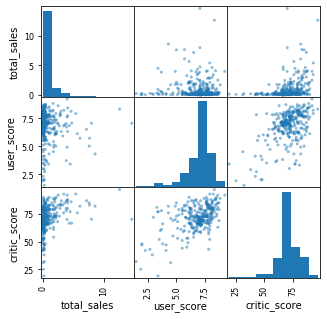

In [70]:
pd.plotting.scatter_matrix(df[df['platform'] == 'ps4'][['total_sales','user_score', 'critic_score']], figsize=(5, 5));

In [71]:
df[df['platform'] == 'ps4'][['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.050876,0.354517
user_score,-0.050876,1.000000,0.503579
critic_score,0.354517,0.503579,1.000000


<div class="alert alert-info">Влияние мнений критиков на продажи игр для PS4 слабое. Мнение пользователей оказывает очень слабое влияние на продажи. Корреляция мнений пользователей и критиков находится на среднем уровне.</div>

<div class="alert alert-info">The influence of critics on PS4 sales is weak. User opinion has very little impact on sales. The correlation between the opinions of users and critics is at an average level.</div>

<a id='Step_16'></a>
### Влияние отзывов на продажи игр на 3DS.

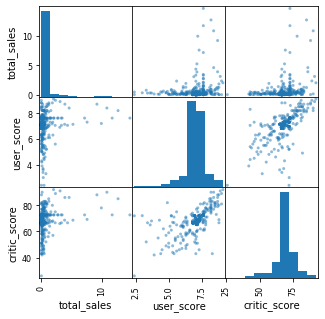

In [72]:
pd.plotting.scatter_matrix(df[df['platform'] == '3ds'][['total_sales','user_score', 'critic_score']], figsize=(5, 5));

In [73]:
df[df['platform'] == '3ds'][['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.165996,0.259248
user_score,0.165996,1.000000,0.631795
critic_score,0.259248,0.631795,1.000000


<div class="alert alert-info">Влияние мнений критиков и пользователей на продажи игр для 3DS очень слабое. Корреляция мнений пользователей и критиков находится на среднем уровне.</div>

<div class="alert alert-info">The influence of critics and users on 3DS game sales is very weak. The correlation between the opinions of users and critics is at an average level.</div>

<a id='Step_17'></a>
### Влияние отзывов на продажи игр на XOne.

### Impact of reviews on game sales on XOne.

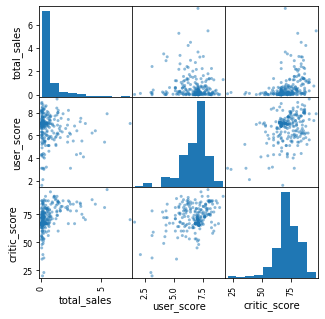

In [74]:
pd.plotting.scatter_matrix(df[df['platform'] == 'xone'][['total_sales','user_score', 'critic_score']], figsize=(5, 5));

In [75]:
df[df['platform'] == 'xone'][['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.088882,0.382426
user_score,-0.088882,1.000000,0.365638
critic_score,0.382426,0.365638,1.000000


<div class="alert alert-info">Влияние мнений критиков на продажи игр для XOne слабое. Мнение пользователей оказывает очень слабое влияние на продажи. Корреляция мнений пользователей и критиков слабая.</div>



<div class="alert alert-info">The influence of critics on XOne game sales is weak. User opinion has very little impact on sales. The correlation between user and critic opinions is weak.</div>

- По всем трём платформам очень слабые корреляции между мнениеми пользователей и продажами.
- 3DS так же имеет очень слабую корреляцию между мнениеми критиков и продажами.
- PS4 и XOne имеют слабые корреляции между мнениями критиков и продажами.



- Across all three platforms, there are very weak correlations between user opinions and sales.
- The 3DS also has a very weak correlation between critics and sales.
- PS4 and XOne have weak correlations between critics and sales.

<a id='Step_18'></a>
### Посмотрим на общее распределение игр по жанрам.

### Let's look at the general distribution of games by genre.

Как и условились раньше, период до 2012 года брать не будем.

As agreed earlier, we will not take the period up to 2012.

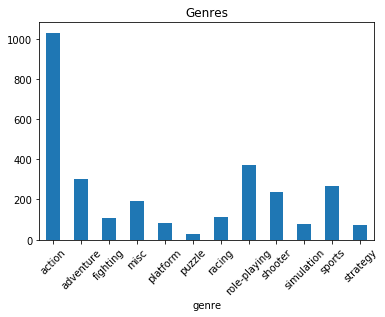

In [76]:
df[df['year_of_release'] > 2011].groupby('genre')['genre'].count().plot(kind='bar', rot=45, title='Genres')

Наиболее популярны жанры: action, role-plaing и adventure. Абсолютным людером является action.
Наименее популярны жанры: puzzle, simulation, strategy и platform.

The most popular genres are action, role-playing and adventure. The absolute luder is action.
The least popular genres are puzzle, simulation, strategy and platform.

### Вывод: 
- данные релевантны, если отнсятся к периоду 2012-2016 годы
- платоформы переживают цикл появдения-исчезновения примерно за 11 лет
- платформа приносит максимальное количество денег примерно в течении 5 лет
- потенциальными платформами мы выбрали PS4, 3DS и XOne
- объемы продаж игр для всех 3ех платформ очень вариативны
- объемы продаж игр для всех 3ех платформ падают
- наибольшую прибыль приносит продажа игр для PS4
- отзывы критиков слабо влияют на продажи игр для 3DS
- отызвы пользователей очень слабо влияют на продажи игр для всех 3ех платофрм
- наиболее поплярен жанр action, наимение популярен жанр puzzle

### Conclusion:
- data are relevant if they refer to the period 2012-2016
- Platforms experience a cycle of appearance and disappearance in about 11 years
- the platform brings the maximum amount of money for about 5 years
- we chose PS4, 3DS and XOne as potential platforms
- game sales volumes for all 3 platforms are very variable
- sales of games for all 3 platforms are falling
- the highest profit comes from the sale of games for PS4
- critical reviews have little effect on sales of 3DS games
- user reviews have very little effect on game sales for all 3 platforms
- the most popular action genre, the least popular puzzle genre

<a id='Step_19'></a>
## Шаг 4. Составим портрет пользователя каждого региона.

## Step 4. Let's make a portrait of the user of each region.

<a id='Step_20'></a>
### Северная Америка.

### North America.

Самые популярные платформы в Северной Америке.

The most popular platforms in North America.

In [77]:
df[df['year_of_release'] > 2011].groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
x360    140.05
ps4     108.74
ps3     103.38
xone     93.12
3ds      55.31
Name: na_sales, dtype: float64

Самые популярные жанры в Северной Америке.

The most popular genres in North America.

In [78]:
df[df['year_of_release'] > 2011].groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
action          177.84
shooter         144.77
sports           81.53
role-playing     64.00
misc             38.19
Name: na_sales, dtype: float64

Влияние рейтнга на продажи в Северной Америке.

The most popular genres in North America.

In [79]:
df[df['year_of_release'] > 2011].groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
m       231.57
e       114.37
e10+     75.70
t        66.02
Name: na_sales, dtype: float64

<a id='Step_21'></a>
### Европа.

### Europe.

Самые популярные платформы в Европе.

The most popular platforms in Europe.

In [80]:
df[df['year_of_release'] > 2011].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
ps4     141.09
ps3     106.86
x360     74.52
xone     51.59
3ds      42.64
Name: eu_sales, dtype: float64

Самые популярные жанры в Европе.

The most popular genres in Europe.

In [81]:
df[df['year_of_release'] > 2011].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
action          159.34
shooter         113.47
sports           69.09
role-playing     48.53
racing           27.29
Name: eu_sales, dtype: float64

Влияние рейтинга на продажи в Европе.

Impact of rating on sales in Europe.

In [82]:
df[df['year_of_release'] > 2011].groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
m       193.96
e       113.03
e10+     55.37
t        52.96
Name: eu_sales, dtype: float64

<a id='Step_22'></a>
### Япония.

### Japan.

Самые популярные платформы в Японии.

The most popular platforms in Japan.

In [83]:
df[df['year_of_release'] > 2011].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
3ds     87.79
ps3     35.29
psv     21.04
ps4     15.96
wiiu    13.01
Name: jp_sales, dtype: float64

Самые популярные жанры в Японии.

The most popular genres in Japan.

In [84]:
df[df['year_of_release'] > 2011].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
role-playing    65.44
action          52.80
misc            12.86
simulation      10.41
fighting         9.44
Name: jp_sales, dtype: float64

Влияние рейтинга на продажи в Японии.

Impact of rating on sales in Japan.

In [85]:
df[df['year_of_release'] > 2011].groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
e       28.33
t       26.02
m       21.20
e10+     8.19
Name: jp_sales, dtype: float64

### Вывод:
- Евпропа и Северная Америка похожи по предпочтениям пользователей в вопросе выбора платформы: всё теже PS3, PS3, XOne и X360 меняются местами. В то время, как в Японии популрны еще и такие платформы: 3DS, PSV, WIIU. Кроме того, продукция XBox там не входит в топ 5 популярных.
- Различия Европы и Северной Америки в выборе жанров в топ 5 незначительны: на 5-ом месте в Европе racing, а в Северной Америке music. Эти страны с Яопнией в выборе жанров связывает только action. Японцы больше всего любят role-playing, misc, simulation, fighting.
- Евпропа и Северная Америка также похожи по выбору рейтинга игр, наибольшее количество продаж в рейтнинге M. В то время, как в Японии первые места занимаеют E и T.

### Conclusion:
- Europe and North America are similar in terms of user preferences in terms of platform choice: all the same PS3, PS3, XOne and X360 are swapped. While in Japan such platforms are also popular: 3DS, PSV, WIIU. In addition, XBox products are not included in the top 5 popular ones there.
- Differences between Europe and North America in the choice of genres in the top 5 are insignificant: racing is in 5th place in Europe, and music in North America. These countries are connected with Japan in the choice of genres only by action. The Japanese are most fond of role-playing, misc, simulation, fighting.
- Europe and North America are also similar in terms of game rankings, with the highest number of sales in the M ranking. While in Japan, E and T take the first places.


<a id='Step_23'></a>
## Шаг 5. Проверим гипотезы.

## Step 5. Test the hypotheses.

Формируем гипотезы таким образом, что бы нулевая гипотеза могла быть сформулирована с использованием слова "равно" и при этом без его отрицания. Мы исследуем экономическое являение - спрос на игры, так что воспользуемся стандартным уровнем значимости - 5%. 

We form hypotheses in such a way that the null hypothesis could be formulated using the word "equals" and at the same time without its negation. We are examining an economic phenomenon - the demand for games, so we will use the standard significance level - 5%.

<a id='Step_24'></a>
### Тест A.

### Test A.

- H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H1 - средние пользовательские рейтинги платформ Xbox One и PC разные.
- Используем двустороннюю гипотезу, так как разность может означать, как положительное так и отрицательное отклонение.

- H0 - The average user ratings of the Xbox One and PC platforms are the same.
- H1 - the average user ratings of the Xbox One and PC platforms are different.
- We use a two-sided hypothesis, since the difference can mean both a positive and a negative deviation.

Сначала проведем тест Левина.

Let's do the Levin test first.

In [86]:
print('Levene test' ,st.levene(df[(df['year_of_release'] > 2011) & (df['platform'] == 'xone')]['user_score'],
                               df[(df['year_of_release'] > 2011) & (df['platform'] == 'pc')]['user_score']))

Levene test LeveneResult(statistic=9.314802899033483, pvalue=0.0023952381042608288)


Диспресии разные, будем иметь это в виду.

The distributions are different, we will keep this in mind.

In [87]:
alpha = .05
results = st.ttest_ind(df[(df['year_of_release'] > 2011) & (df['platform'] == 'xone')]['user_score'],
                               df[(df['year_of_release'] > 2011) & (df['platform'] == 'pc')]['user_score'], equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3358176607162189
Не получилось отвергнуть нулевую гипотезу


p-value: 0.3358176607162189
Failed to reject the null hypothesis

<a id='Step_25'></a>
### Тест B.

### Test B.

- H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.
- H1 - средние пользовательские рейтинги жанров Action и Sports разные.
- Используем двустороннюю гипотезу, так как разность может означать, как положительное так и отрицательное отклонение.



- H0 - the average user ratings of the Action and Sports genres are the same.
- H1 - average user ratings of Action and Sports genres are different.
- We use a two-sided hypothesis, since the difference can mean both a positive and a negative deviation.

Сначала проведем тест Левина.

Let's do the Levin test first.

In [88]:
print('Levene test' ,st.levene(df[(df['genre'] == 'action')]['user_score'],
                               df[(df['genre'] == 'sports')]['user_score']))

Levene test LeveneResult(statistic=0.014947469308823642, pvalue=0.9026976120431844)


Дисперсии достаточно схожи, учтем это в проверке.

The dispersions are quite similar, we will take this into account in the verification.

In [89]:
alpha = .05
results = st.ttest_ind(df[(df['year_of_release'] > 2011) & (df['genre'] == 'action')]['user_score'],
                               df[(df['year_of_release'] > 2011) & (df['genre'] == 'sports')]['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2381219189333745e-39
Отвергаем нулевую гипотезу


p-value: 1.2381219189333745e-39
Rejecting the null hypothesis

In [90]:
print('Средний пользовтельский рейтинг action', df[(df['year_of_release'] > 2011) & (df['genre'] == 'action')]['user_score'].mean())
print('Средний пользовтельский рейтинг sports', df[(df['year_of_release'] > 2011) & (df['genre'] == 'sports')]['user_score'].mean())

Средний пользовтельский рейтинг action 6.9378799298256775
Средний пользовтельский рейтинг sports 5.865922991569803


Average user rating action 6.9378799298256775
Average user rating sports 5.865922991569803

### Вывод:
- Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанра Action выше чем у Sports.

### Conclusion:
- The average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action genre are higher than for Sports.

<a id='Step_26'></a>
## Шаг 6. Вывод.

## Step 6. Conclusion.

На первом шаге мы изучили общую информацию о данных.

In the first step, we learned general information about the data.

На втором шаге мы подготовили данные: обработали дубликаты и пропуски, привели переменные к нужным форматам.

At the second step, we prepared the data: processed duplicates and omissions, brought the variables to the required formats.

На третем шаге мы провели исследовательский анализ данных и получили следующие результаты:
- данные релевантны, если отнсятся к периоду 2012-2016 годы
- платоформы переживают цикл появдения-исчезновения примерно за 11 лет
- платформа приносит максимальное количество денег примерно в течении 5 лет
- потенциальными платформами мы выбрали PS4, 3DS и XOne
- объемы продаж игр для всех 3ех платформ очень вариативны
- объемы продаж игр для всех 3ех платформ падают
- наибольшую прибыль приносит продажа игр для PS4
- отзывы критиков слабо влияют на продажи игр для 3DS
- отызвы пользователей очень слабо влияют на продажи игр для всех 3ех платофрм
- наиболее поплярен жанр action, наимение популярен жанр puzzle

In the third step, we conducted an exploratory data analysis and obtained the following results:
- data are relevant if they refer to the period 2012-2016
- Platforms experience a cycle of appearance and disappearance in about 11 years
- the platform brings the maximum amount of money for about 5 years
- we chose PS4, 3DS and XOne as potential platforms
- game sales volumes for all 3 platforms are very variable
- sales of games for all 3 platforms are falling
- the highest profit comes from the sale of games for PS4
- critical reviews have little effect on sales of 3DS games
- user reviews have very little effect on game sales for all 3 platforms
- the most popular action genre, the least popular puzzle genre

На четвертом шаге мы определи предпочтения пользователей в Северной Америке, Европе и Японии и получили следующие результаты:
- Евпропа и Северная Америка похожи по предпочтениям пользователей в вопросе выбора платформы: всё теже PS3, PS3, XOne и X360 меняются местами. В то время, как в Японии популрны еще и такие платформы: 3DS, PSV, WIIU. Кроме того, продукция XBox там не входит в топ 5 популярных.
- Различия Европы и Северной Америки в выборе жанров в топ 5 незначительны: на 5-ом месте в Европе racing, а в Северной Америке music. Эти страны с Яопнией в выборе жанров связывает только action. Японцы больше всего любят role-playing, misc, simulation, fighting.
- Евпропа и Северная Америка также похожи по выбору рейтинга игр, наибольшее количество продаж в рейтнинге M. В то время, как в Японии первые места занимаеют E и T.

In the fourth step, we determined the preferences of users in North America, Europe and Japan and got the following results:
- Europe and North America are similar in terms of user preferences in terms of platform choice: all the same PS3, PS3, XOne and X360 are swapped. While in Japan such platforms are also popular: 3DS, PSV, WIIU. In addition, XBox products are not included in the top 5 popular ones there.
- Differences between Europe and North America in the choice of genres in the top 5 are insignificant: racing is in 5th place in Europe, and music in North America. These countries are connected with Japan in the choice of genres only by action. The Japanese are most fond of role-playing, misc, simulation, fighting.
- Europe and North America are also similar in terms of game rankings, with the highest number of sales in the M ranking. While in Japan, E and T take the first places.

На пятом шаге мы провели статистический анализ и получили следующие результаты:
- Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанра Action выше чем у Sports.

At the fifth step, we performed a statistical analysis and obtained the following results:
- The average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action genre are higher than for Sports.

<div class="alert alert-info">Я бы порекомендовал компании, в 2017 году сделать следующее:</div>

<div class="alert alert-info">I would recommend that companies do the following in 2017:</div>

- В Северной Америке сделать акцент на продажах action и shooter для XOne и PS4, с рейтингами M и E.
- В Европе сделать акцент на продажах action и shooter для PS4 и PS3, с рейтингами M и E.
- В Японии сделать акцент на продажах role-playing и action для 3DS и PS3, с рейтингами E, T и M.

- In North America, to focus on sales of action and shooter for XOne and PS4, rated M and E.
- In Europe, to focus on sales of action and shooter for PS4 and PS3, rated M and E.
- In Japan, focus on sales of role-playing and action for 3DS and PS3, rated E, T and M.

<div class="alert alert-info">Также следует обратить внимание, что, как и во многих сферах, мнение пользователей не отражает реальной ситуации.</div>

<div class="alert alert-info">It should also be noted that, as in many areas, users' opinions do not reflect the real situation.</div>

<div class="alert alert-info">Кстати самая продавая игра выпущенная позже 2011 год - это "grand theft auto v".</div>

<div class="alert alert-info">By the way, the best selling game released after 2011 is "grand theft auto v".</div>